<a href="https://colab.research.google.com/github/johhan27/DS-Unit-2-Applied-Modeling/blob/master/LS_DS_231_assignment(Project).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 3, Module 1*

---


# Define ML problems

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your decisions.

- [ ] Choose your target. Which column in your tabular dataset will you predict?
- [ ] Is your problem regression or classification?
- [ ] How is your target distributed?
    - Classification: How many classes? Are the classes imbalanced?
    - Regression: Is the target right-skewed? If so, you may want to log transform the target.
- [ ] Choose your evaluation metric(s).
    - Classification: Is your majority class frequency >= 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?
    - Regression: Will you use mean absolute error, root mean squared error, R^2, or other regression metrics?
- [ ] Choose which observations you will use to train, validate, and test your model.
    - Are some observations outliers? Will you exclude them?
    - Will you do a random split or a time-based split?
- [ ] Begin to clean and explore your data.
- [ ] Begin to choose which features, if any, to exclude. Would some features "leak" future information?

If you haven't found a dataset yet, do that today. [Review requirements for your portfolio project](https://lambdaschool.github.io/ds/unit2) and choose your dataset.

Some students worry, ***what if my model isn't “good”?*** Then, [produce a detailed tribute to your wrongness. That is science!](https://twitter.com/nathanwpyle/status/1176860147223867393)

In [1]:
#https://www.kaggle.com/karangadiya/fifa19 FIFA 19 complete player dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('data.csv')

In [4]:
df.set_index('ID', inplace=True)

In [5]:
df.describe()

,Unnamed: 0,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,9103.000000,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,49.734181,45.550911,52.298144,58.686712,42.909026,55.371001,47.170824,42.863153,52.711933,58.369459,64.614076,64.726967,63.503607,61.836610,63.966573,55.460047,65.089432,63.219946,65.311967,47.109973,55.868991,46.698276,49.958478,53.400903,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,5256.052511,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,18.364524,19.525820,17.379909,14.699495,17.694408,18.910371,18.395264,17.478763,15.327870,16.686595,14.927780,14.649953,14.766049,9.010464,14.136166,17.237958,11.820044,15.894741,12.557000,19.260524,17.367967,20.696909,19.529036,14.146881,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,0.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,3.000000,9.000000,5.000000,12.000000,12.000000,14.000000,21.000000,16.000000,2.000000,15.000000,12.000000,17.000000,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4551.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,38.000000,30.000000,44.000000,54.000000,30.000000,49.000000,34.000000,31.000000,43.000000,54.000000,57.000000,57.000000,55.000000,56.000000,56.000000,45.000000,58.000000,56.000000,58.000000,33.000000,44.000000,26.000000,38.000000,44.000000,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,48.000000,41.000000,56.000000,63.000000,67.000000,67.000000,66.000000,62.000000,66.000000,59.000000,66.000000,66.000000,67.000000,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,64.000000,62.000000,64.000000,68.000000,57.000000,68.000000,62.000000,57.000000,64.000000,69.000000,75.000000,75.000000,74.000000,68.000000,74.000000,68.000000,73.000000,74.000000,74.000000,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,93.000000,95.000000,94.000000,93.000000,90.000000,97.000000,94.000000,94.000000,93.000000,96.000000,97.000000,96.000000,96.000000,96.000000,96.000000,95.000000,95.000000,96.000000,97.000000,94.000000,95.000000,92.000000,95.000000,94.000000,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.00

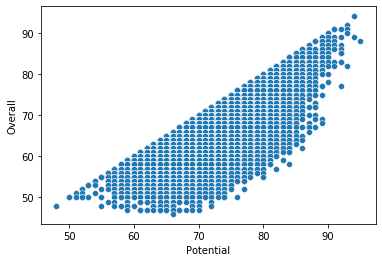

In [6]:
sns.scatterplot(data=df, x='Potential', y='Overall')

In [7]:
df.describe(exclude='number')

,Name,Photo,Nationality,Flag,Club,Club Logo,Value,Wage,Preferred Foot,Work Rate,Body Type,Real Face,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Release Clause
count,18207,18207,18207,18207,17966,18207,18207,18207,18159,18159,18159,18159,18147,16654,1264,17918,18159,18159,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16643
unique,17194,18207,164,164,651,679,217,144,2,9,10,2,27,1736,341,36,21,57,93,93,93,105,102,102,102,105,101,101,101,100,92,92,92,100,95,99,99,99,95,98,108,108,108,98,1244
top,J. Rodríguez,https://cdn.sofifa.org/players/4/19/189506.png,England,https://cdn.sofifa.org/flags/14.png,Manchester United,https://cdn.sofifa.org/teams/2/light/9.png,€1.1M,€1K,Right,Medium/ Medium,Normal,No,ST,"Jul 1, 2018",Atalanta,2019,6'0,165lbs,61+2,61+2,61+2,63+2,61+2,61+2,61+2,63+2,61+2,61+2,61+2,61+2,58+2,58+2,58+2,61+2,61+2,62+2,62+2,62+2,61+2,61+2,63+2,63+2,63+2,61+2,€1.1M
freq,11,1,1662,1662,33,33,431,4900,13948,9810,10595,16505,2152,1538,20,4819,2881,1483,705,705,705,745,713,713,713,745,744,744,744,804,762,762,762,804,713,660,660,660,713,669,634,634,634,669,557


In [8]:
def wrangle(df):

  #encoding "work rate"
  def wr_encoder(rate):
    wr_dict = {'Low':1, 'Medium':2, 'High':3}

    if type(rate) != str:
      return float('nan')
    else:   
      attack, defense = rate.split('/')
      return wr_dict[attack.strip()]*wr_dict[defense.strip()]

  df['Work Rate'] = df['Work Rate'].apply(wr_encoder)

  return df

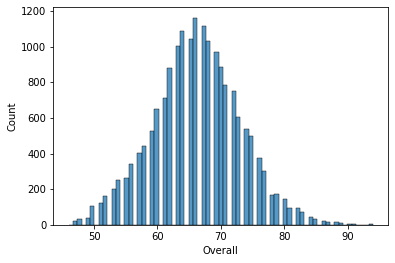

In [9]:
#Target: Overall 
#Regression Model 

#Target Distribution: Normal 
#Evaluation metric: RMSE root mean square error
#We'll drop players over 90
#Random Train-Test Split 

sns.histplot(data=df, x='Overall')
df = df[df.Overall < 91]

In [10]:
df.describe()

,Unnamed: 0,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18198.000000,18198.000000,18198.000000,18198.000000,18198.000000,18150.000000,18150.000000,18150.000000,18138.000000,18150.000000,18150.000000,18150.000000,18150.000000,18150.000000,18150.000000,18150.000000,18150.000000,18150.000000,18150.000000,18150.000000,18150.000000,18150.000000,18150.000000,18150.000000,18150.000000,18150.000000,18150.000000,18150.000000,18150.000000,18150.000000,18150.000000,18150.000000,18150.000000,18150.000000,18150.000000,18150.000000,18150.000000,18150.000000,18150.000000,18150.000000,18150.000000,18150.000000,18150.000000
mean,9107.500000,25.120013,66.226069,71.296956,1597.539894,1.111570,2.946777,2.360661,19.551439,49.722094,45.536033,52.292066,58.675096,42.893829,55.358788,47.155868,42.847383,52.699725,58.355482,64.605069,64.719890,63.493168,61.821928,63.959394,55.448540,65.086446,63.211625,65.310413,47.095978,55.865179,46.697576,49.944959,53.385895,48.534766,58.634215,47.282259,47.699339,45.663691,16.614050,16.389642,16.229642,16.385840,16.708044
std,5253.454435,4.669702,6.887192,6.120294,272.327842,0.386923,0.660037,0.755355,15.949724,18.354896,19.511551,17.376398,14.691293,17.678620,18.899594,18.381887,17.462713,15.319525,16.675061,14.923950,14.648394,14.760319,8.988267,14.131521,17.230008,11.818748,15.891160,12.557330,19.247329,17.367705,20.695679,19.516391,14.132375,15.692794,11.420051,19.902978,21.662703,21.287196,17.690651,16.902863,16.497608,17.029799,17.949277
min,9.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,3.000000,9.000000,5.000000,12.000000,12.000000,14.000000,21.000000,16.000000,2.000000,15.000000,12.000000,17.000000,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4558.250000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,38.000000,30.000000,44.000000,54.000000,30.000000,49.000000,34.000000,31.000000,43.000000,54.000000,57.000000,57.000000,55.000000,56.000000,56.000000,45.000000,58.000000,56.000000,58.000000,33.000000,44.000000,26.000000,38.000000,44.000000,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9107.500000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,48.000000,41.000000,56.000000,63.000000,67.000000,67.000000,66.000000,62.000000,66.000000,59.000000,66.000000,66.000000,67.000000,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13656.750000,28.000000,71.000000,75.000000,1786.000000,1.000000,3.000000,3.000000,26.000000,64.000000,62.000000,64.000000,68.000000,57.000000,68.000000,62.000000,57.000000,64.000000,69.000000,75.000000,75.000000,74.000000,68.000000,74.000000,68.000000,73.000000,74.000000,74.000000,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,45.000000,90.000000,95.000000,2279.000000,5.000000,5.000000,5.000000,99.000000,92.000000,94.000000,94.000000,93.000000,90.000000,94.000000,94.000000,93.000000,93.000000,95.000000,97.000000,96.000000,95.000000,93.000000,96.000000,94.000000,94.000000,96.000000,97.000000,93.000000,95.000000,92.000000,93.000000,93.000000,92.000000,93.000000,94.000000,93.000000,90.000000,90.000000,92.00

In [11]:
target = 'Overall'
features = df.columns.to_list()
features.remove(target)

X = df[features]
y = df[target]

In [12]:
from sklearn.model_selection import train_test_split

X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

In [13]:
X_train_full = wrangle(X_train_full)
X_valid_full = wrangle(X_valid_full)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [14]:
X_train_full.describe()

,Unnamed: 0,Age,Potential,Special,International Reputation,Weak Foot,Skill Moves,Work Rate,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,14558.000000,14558.000000,14558.000000,14558.000000,14521.000000,14521.000000,14521.000000,14521.000000,14511.000000,14521.000000,14521.000000,14521.000000,14521.000000,14521.000000,14521.00000,14521.000000,14521.000000,14521.000000,14521.000000,14521.000000,14521.000000,14521.000000,14521.000000,14521.000000,14521.000000,14521.000000,14521.000000,14521.000000,14521.000000,14521.000000,14521.000000,14521.000000,14521.000000,14521.000000,14521.000000,14521.000000,14521.000000,14521.000000,14521.000000,14521.000000,14521.000000,14521.000000,14521.000000
mean,9098.328067,25.111073,71.337546,1595.938934,1.112320,2.944494,2.358446,4.596929,19.627593,49.621858,45.505957,52.220302,58.591488,42.843468,55.25928,47.043730,42.770884,52.588596,58.267199,64.596929,64.698092,63.425728,61.839818,63.920391,55.364369,65.056057,63.104538,65.278562,46.999862,55.731906,46.582467,49.876386,53.344122,48.501756,58.643964,47.226431,47.576958,45.554301,16.711315,16.462985,16.308794,16.457957,16.805316
std,5265.294320,4.683933,6.138949,273.061715,0.389763,0.662206,0.757574,1.568804,16.078391,18.417859,19.585804,17.469856,14.781039,17.732725,18.99233,18.408487,17.480183,15.384306,16.755685,14.935075,14.655743,14.833098,8.978638,14.141634,17.280909,11.798896,15.927373,12.565427,19.332818,17.383745,20.707266,19.589895,14.136299,15.684379,11.404228,19.930319,21.742879,21.359544,17.831677,17.028247,16.587607,17.155986,18.109661
min,10.000000,16.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,4.000000,11.000000,4.000000,4.00000,6.000000,3.000000,9.000000,5.000000,13.000000,14.000000,15.000000,30.000000,16.000000,2.000000,16.000000,12.000000,24.000000,3.000000,11.000000,3.000000,2.000000,10.000000,7.000000,12.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4543.250000,21.000000,67.000000,1454.000000,1.000000,3.000000,2.000000,4.000000,9.000000,38.000000,30.000000,44.000000,53.000000,30.000000,49.00000,34.000000,31.000000,43.000000,54.000000,57.000000,57.000000,55.000000,56.000000,56.000000,45.000000,58.000000,56.000000,58.000000,32.000000,44.000000,26.000000,38.000000,44.000000,39.000000,51.000000,30.000000,26.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9088.500000,25.000000,71.000000,1633.000000,1.000000,3.000000,2.000000,4.000000,17.000000,54.000000,49.000000,56.000000,62.000000,44.000000,61.00000,48.000000,41.000000,56.000000,63.000000,67.000000,67.000000,66.000000,62.000000,66.000000,59.000000,66.000000,66.000000,66.000000,51.000000,58.000000,52.000000,55.000000,55.000000,49.000000,59.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13656.750000,28.000000,75.000000,1786.000000,1.000000,3.000000,3.000000,6.000000,26.000000,64.000000,62.000000,64.000000,68.000000,57.000000,68.00000,62.000000,56.000000,64.000000,69.000000,75.000000,75.000000,74.000000,68.000000,74.000000,68.000000,73.000000,74.000000,74.000000,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,45.000000,95.000000,2279.000000,5.000000,5.000000,5.000000,9.000000,99.000000,92.000000,94.000000,94.000000,93.000000,90.000000,94.00000,94.000000,92.000000,93.000000,95.000000,97.000000,96.000000,95.000000,93.000000,96.000000,94.000000,94.000000,96.000000,95.000000,93.000000,95.000000,92.000000,93.000000,93.000000,92.000000,93.000000,94.000000,93.000000,90.000000,90.000000,91.000000,91.0

In [15]:
  #unnamed is useless 
  #potential is very related to our target and it's a "future" leaking
  #special is a misleading integer
  #jersey number is irrelevant to Overall
  drop_cols = ['Unnamed: 0', 'Potential', 'Special', 'Jersey Number']
  X_train_full.drop(drop_cols, axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [16]:
num_cols = X_train_full.describe().columns.to_list()

In [17]:
X_train = X_train_full[num_cols]
X_valid = X_valid_full[num_cols]

In [18]:
#X_train[X_train.isnull().any(axis=1)]

In [19]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14558 entries, 229942 to 229878
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       14558 non-null  int64  
 1   International Reputation  14521 non-null  float64
 2   Weak Foot                 14521 non-null  float64
 3   Skill Moves               14521 non-null  float64
 4   Work Rate                 14521 non-null  float64
 5   Crossing                  14521 non-null  float64
 6   Finishing                 14521 non-null  float64
 7   HeadingAccuracy           14521 non-null  float64
 8   ShortPassing              14521 non-null  float64
 9   Volleys                   14521 non-null  float64
 10  Dribbling                 14521 non-null  float64
 11  Curve                     14521 non-null  float64
 12  FKAccuracy                14521 non-null  float64
 13  LongPassing               14521 non-null  float64
 14  

In [20]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
import xgboost as xgb

model = make_pipeline(
    SimpleImputer(strategy='median'),
    LinearRegression()
)

model.fit(X_train, y_train)

model_2 = make_pipeline(
    SimpleImputer(strategy='median'),
    xgb.XGBRegressor()
)

model_2.fit(X_train,y_train)

[00:40:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Pipeline(memory=None,
         steps=[('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='median',
                               verbose=0)),
                ('xgbregressor',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, gamma=0,
                              importance_type='gain', learning_rate=0.1,
                              max_delta_step=0, max_depth=3, min_child_weight=1,
                              missing=None, n_estimators=100, n_jobs=1,
                              nthread=None, objective='reg:linear',
                              random_state=0, reg_alpha=0, reg_lambda=1,
                              scale_pos_weight=1, seed=None, silent=None,
                              subsample=1, verbosity=1))],
         verbose=False)

In [21]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

mae_model_1 = mean_absolute_error(y_valid, model.predict(X_valid))
mae_model_2 = mean_absolute_error(y_valid, model_2.predict(X_valid))
r2_score_model_1 = r2_score(y_valid, model.predict(X_valid))
r2_score_model_2 = r2_score(y_valid, model_2.predict(X_valid))

print("mae_model_1(Linear Regressor):", mae_model_1)
print("mae_model_2(XGB Regressor):", mae_model_2)
print("r2_score_model_1:", r2_score_model_1)
print("r2_score_model_2:", r2_score_model_2)

mae_model_1(Linear Regressor): 1.9560284020534744
mae_model_2(XGB Regressor): 1.185246864779965
r2_score_model_1: 0.8690416436137998
r2_score_model_2: 0.9480588999868848


In [22]:
#Let's check out the baseline

y_train_mean = y_train.mean()
print ("y_train_mean:",y_train_mean)

y_train_mean: 66.23835691715895


In [23]:
baseline_mae = mean_absolute_error(y_valid, [y_train_mean for times in range(len(y_valid))])
print ("baseline_mae:",baseline_mae)

baseline_mae: 5.349280483220585


In [24]:
#we were able to beat the baseline very quickly using good numeric columns

In [25]:
!pip install eli5
import eli5
from eli5.sklearn import PermutationImportance

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [26]:
perm = PermutationImportance(model_2, random_state=1).fit(X_valid, y_valid)
eli5.show_weights(perm, feature_names = X_valid.columns.tolist())

Weight,Feature
0.2104 ± 0.0083,Reactions
0.0754 ± 0.0022,BallControl
0.0335 ± 0.0024,StandingTackle
0.0333 ± 0.0037,Composure
0.0201 ± 0.0015,HeadingAccuracy
0.0157 ± 0.0004,GKDiving
0.0144 ± 0.0007,Finishing
0.0121 ± 0.0011,GKHandling
0.0110 ± 0.0008,ShortPassing
0.0093 ± 0.0009,SprintSpeed


In [27]:
#install packages 
!pip install pdpbox
!pip install shap

# increase the dots per inch (double it), so the text isn't so fuzzy
plt.rcParams['figure.dpi'] = 72

In [28]:
X_valid_imputed = pd.DataFrame(SimpleImputer(strategy='mean').fit_transform(X_valid), columns=X_valid.columns)

In [29]:
X_valid_imputed

,Age,International Reputation,Weak Foot,Skill Moves,Work Rate,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,19.0,1.00000,3.000000,3.000000,4.000000,63.000000,30.000000,55.000000,64.000000,29.000000,66.000000,41.000000,42.000000,44.000000,66.000000,79.000000,81.000000,68.00000,60.000000,68.000000,40.00000,60.000000,71.000000,74.000000,30.000000,49.000000,63.00000,50.000000,41.000000,44.00000,66.000000,65.000000,68.000000,62.000000,7.000000,8.00000,8.000000,11.000000,12.000000
1,28.0,1.10857,2.955911,2.369523,4.627721,50.123174,45.656379,52.579223,59.009645,43.095343,55.756958,47.604574,43.153486,53.144392,58.708735,64.637641,64.807109,63.76302,61.750344,64.115459,55.78534,65.208046,63.640121,65.437862,47.480573,56.398457,47.15817,50.219344,53.553045,48.66685,58.595205,47.505649,48.189033,46.101405,16.224855,16.09617,15.912924,16.097272,16.318821
2,19.0,1.00000,3.000000,2.000000,4.000000,40.000000,59.000000,41.000000,49.000000,49.000000,57.000000,47.000000,57.000000,42.000000,55.000000,74.000000,71.000000,59.00000,55.000000,76.000000,55.00000,55.000000,54.000000,45.000000,55.000000,39.000000,13.00000,52.000000,50.000000,59.00000,46.000000,12.000000,19.000000,14.000000,7.000000,6.00000,13.000000,9.000000,11.000000
3,25.0,1.00000,3.000000,3.000000,4.000000,64.000000,50.000000,37.000000,64.000000,30.000000,67.000000,50.000000,39.000000,57.000000,65.000000,72.000000,70.000000,71.00000,66.000000,71.000000,43.00000,68.000000,72.000000,69.000000,47.000000,65.000000,67.00000,67.000000,55.000000,39.00000,60.000000,60.000000,64.000000,64.000000,9.000000,13.00000,13.000000,7.000000,13.000000
4,30.0,1.00000,2.000000,2.000000,3.000000,22.000000,32.000000,76.000000,62.000000,32.000000,43.000000,22.000000,24.000000,59.000000,51.000000,39.000000,36.000000,46.00000,62.000000,40.000000,56.00000,68.000000,68.000000,84.000000,30.000000,79.000000,69.00000,26.000000,37.000000,44.00000,63.000000,69.000000,69.000000,67.000000,6.000000,13.00000,15.000000,10.000000,7.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3635,25.0,1.00000,3.000000,3.000000,3.000000,64.000000,70.000000,75.000000,58.000000,68.000000,66.000000,49.000000,69.000000,43.000000,70.000000,65.000000,66.000000,63.00000,72.000000,59.000000,76.00000,74.000000,63.000000,74.000000,65.000000,57.000000,36.00000,75.000000,62.000000,78.00000,74.000000,50.000000,32.000000,37.000000,11.000000,15.00000,10.000000,9.000000,16.000000
3636,22.0,1.00000,2.000000,1.000000,4.000000,15.000000,13.000000,12.000000,22.000000,11.000000,14.000000,18.000000,12.000000,15.000000,21.000000,42.000000,39.000000,37.00000,63.000000,51.000000,25.00000,58.000000,40.000000,62.000000,12.000000,38.000000,28.00000,18.000000,58.000000,14.00000,52.000000,13.000000,12.000000,15.000000,64.000000,58.00000,59.000000,64.000000,65.000000
3637,23.0,1.00000,3.000000,3.000000,4.000000,73.000000,63.000000,42.000000,76.000000,54.000000,74.000000,63.000000,58.000000,73.000000,77.000000,68.000000,54.000000,73.00000,73.000000,67.000000,68.00000,53.000000,69.000000,71.000000,65.000000,74.000000,70.00000,65.000000,74.000000,68.00000,54.000000,72.000000,70.000000,66.000000,9.000000,13.00000,9.000000,15.000000,7.000000
3638,29.0,1.00000,3.000000,2.000000,3.000000,23.000000,24.000000,71.000000,66.000000,21.000000,38.000000,26.000000,17.000000,54.000000,52.000000,40.000000,34.000000,35.00000,66.000000,29.000000,43.00000,59.000000,56.000000,86.000000,20.000000,71.000000,68.00000,26.000000,24.000000,29.00000,60.000000,69.000000,63.000000,60.000000,9.000000,10.00000,12.000000,11.000000,5.000000


In [34]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'Stamina'

isolated = pdp_isolate(
    model = model_2, 
    dataset = X_valid_imputed,
    model_features = X_valid.columns, 
    feature = feature,
    num_grid_points=50
)

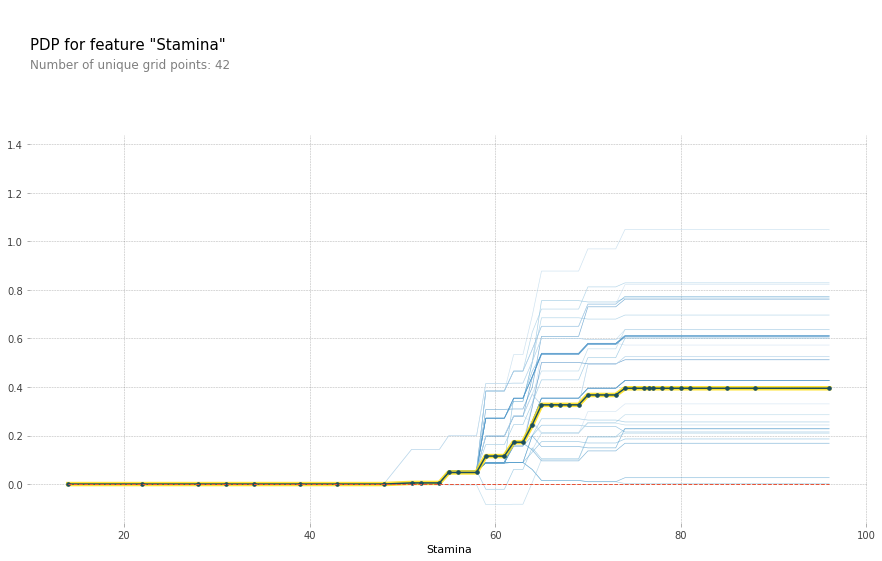

In [35]:
pdp_plot(isolated, feature_name=feature, plot_lines=True, frac_to_plot=0.01);


(<Figure size 540x684 with 3 Axes>,
 {'pdp_inter_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f62f91fb7d0>,
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f62f91ed690>})

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


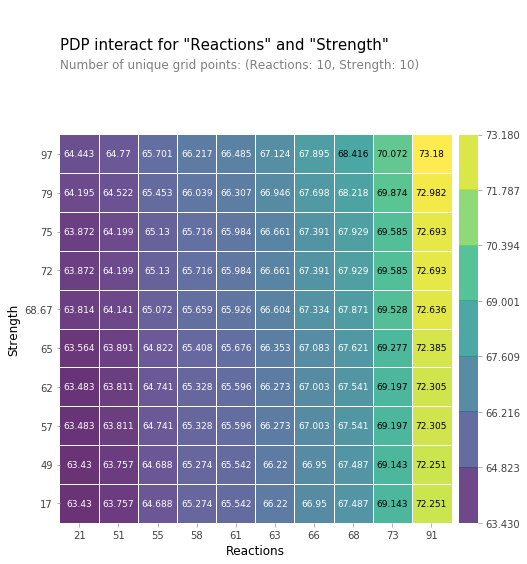

In [38]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

features = ['Reactions', 'Strength']

interaction = pdp_interact(
    model = model_2, 
    dataset=X_valid_imputed, 
    model_features=X_valid.columns, 
    features = features
)


pdp_interact_plot(interaction, plot_type='grid',feature_names = features)

In [41]:
model_2.named_steps['xgbregressor']

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [42]:
# Why did the model predict this?
# Look at a Shapley Values Force Plot

import shap 

row = X_valid.iloc[0]

explainer = shap.TreeExplainer(model_2.named_steps['xgbregressor'])
shap_values = explainer.shap_values(row)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values, 
    features=row
)
#y_train_mean = 66.238, extra close to the "base value"